Last edit: 2024-07-08
# Example notebook, more compact
In this example notenbook, the same example data is processed, but in a more compact fashion and with `debug=False`. This is useful when you already know that your setting work well for the recorded dataset and you just want to process a folder full of files, without getting a lot of debug-messages for each file.

In [1]:
import parrot

# To read-in the raw data
import h5py
# To have the plots inline
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
with h5py.File(r"parrot/example_data/light.h5", "r") as f:
    time = f["time"][:]
    position = f["position"][:]
    signal = f["signal"][:]
    light = {"time": time, "position": position, "signal": signal}
    
with h5py.File(r"parrot/example_data/dark1.h5", "r") as f:
    time = f["time"][:]
    position = f["position"][:]
    signal = f["signal"][:]
    dark1 = {"time": time, "position": position, "signal": signal}

with h5py.File(r"parrot/example_data/dark2.h5", "r") as f:
    time = f["time"][:]
    position = f["position"][:]
    signal = f["signal"][:]
    dark2 = {"time": time, "position": position, "signal": signal}

In [4]:
scale = 50e-12 / 20
data = parrot.process.thz_and_two_darks(light, 
                                        dark1, 
                                        dark2, 
                                        scale=scale, 
                                        debug=False)

In [5]:
data = parrot.post_process_data.correct_systematic_errors(data)
data = parrot.post_process_data.window(data)
data = parrot.post_process_data.pad_zeros(data)

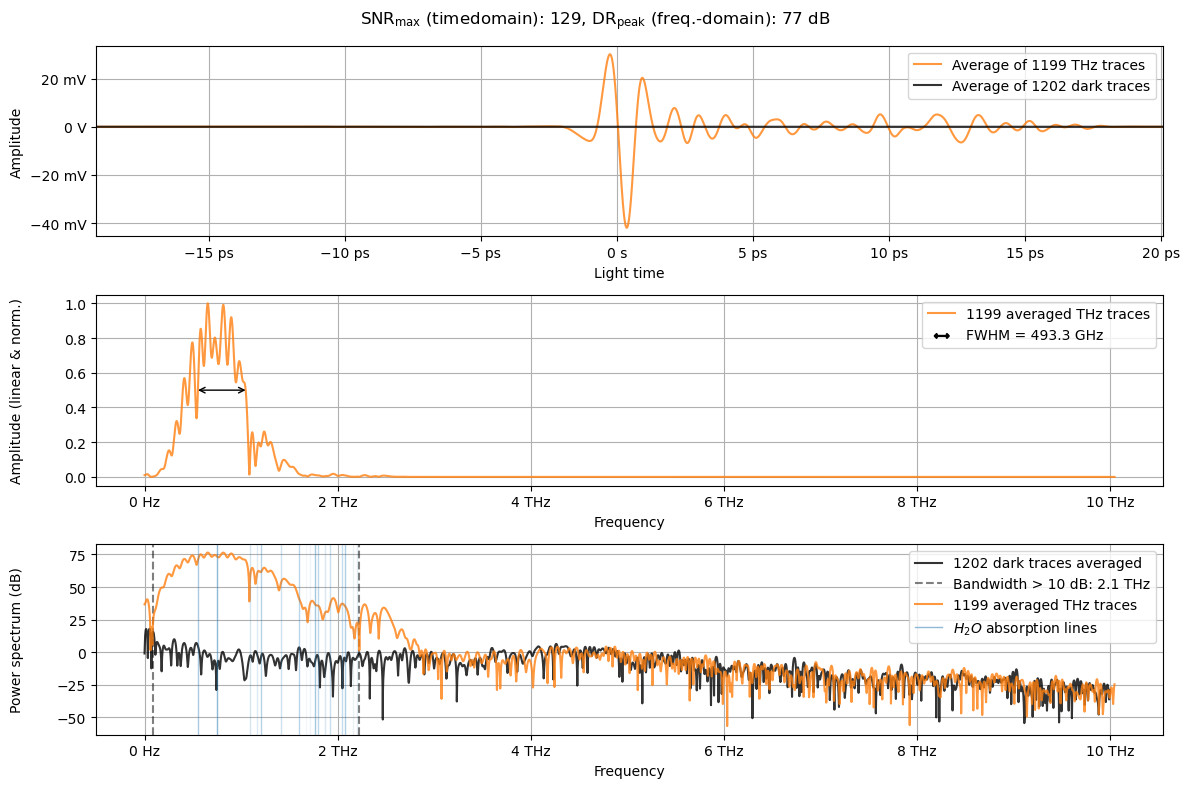

In [6]:
parrot.plot.simple_multi_cycle(data)

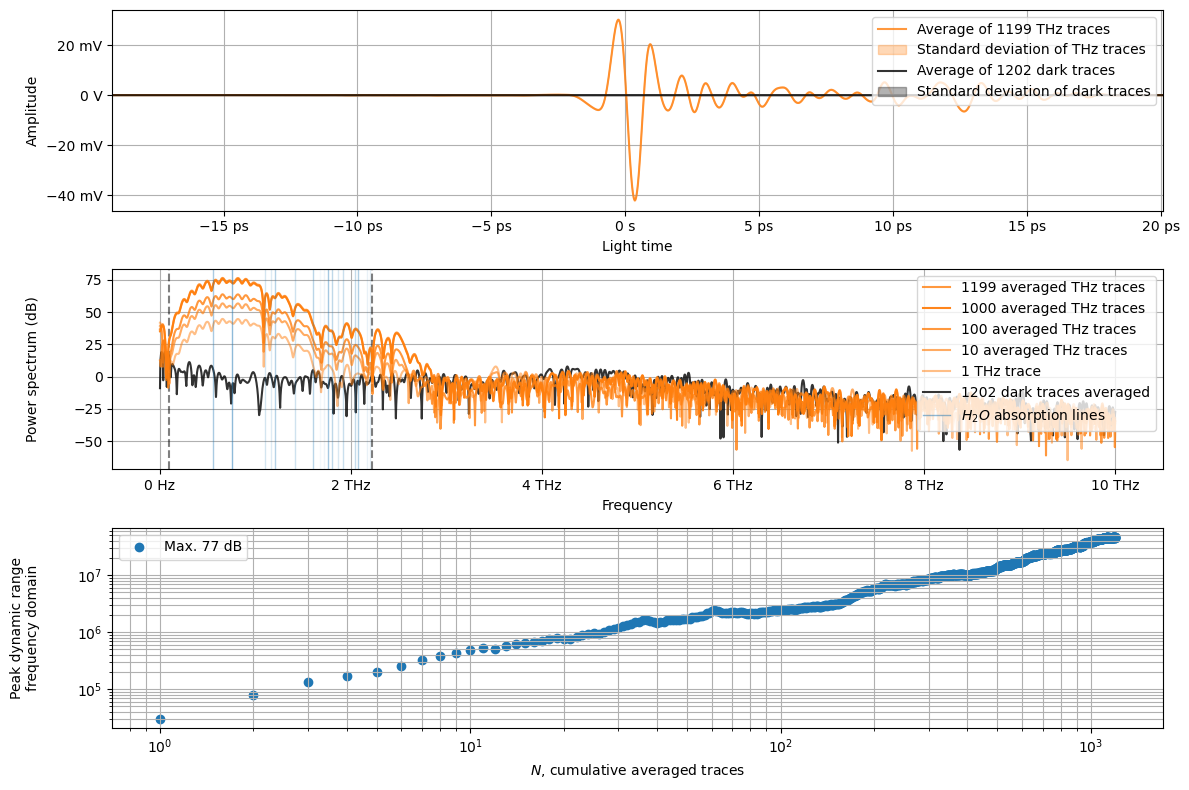

In [7]:
parrot.plot.extended_multi_cycle(data)